<a href="https://colab.research.google.com/github/saurabhlalsaxena/Perplexity-Clone-v0.1/blob/main/LangChain_Perpexity_Clone_with_human_in_the_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install -q -U langchain-cli langchain langchain_core langgraph langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.

In [2]:
!pip install -q langchainhub

In [3]:
!pip install -q openai langchain_openai langchain-anthropic langchain-mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.5/891.5 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.3 MB/s eta 0:00:00


In [4]:
!pip install -q duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 48.1 MB/s eta 0:00:00


In [5]:
!pip install -q html2text beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [6]:
%%capture --no-stderr
%pip install -U psycopg psycopg-pool

In [7]:
%%capture --no-stderr
%pip install -U langgraph-checkpoint-postgres

In [8]:
!pip freeze | grep -E 'langchain|langchain_core|langgraph|langchainhub|openai|langchain_openai|langchain-anthropic|langchain-mistralai|duckduckgo-search|html2text|beautifulsoup4|psycopg|psycopg-pool|langgraph-checkpoint-postgres' > requirements.txt

In [9]:
import os
import openai
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["ANTHROPIC_API_KEY"] = userdata.get('ANTHROPIC_API_KEY')
os.environ["MISTRAL_API_KEY"] = userdata.get('MISTRAL_API_KEY')

In [10]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = f"LangChain Perpexity Clone with human in the loop"

In [11]:
os.environ['USER_AGENT'] = 'myagent'

#LangGraph

In [70]:
#prompts
ADDITIONAL_QUESTION_PROMPT = """You are tasked with analyzing a message to determine if it requires additional input from the user.
Your goal is to be conservative in asking for additional input, only indicating that more information is needed if it is relevant to answering the question or fulfilling the request in the message.
Use the following criteria to guide your decision:
- Is the core question or request clearly stated?
- Are all necessary details provided to understand the context?
- Would additional information significantly change or improve the response?
- Is the missing information essential or helpful?

Before giving your final answer, think through your analysis in a scratchpad:

<scratchpad>
Analyze the message here, considering the criteria above. Think step-by-step about whether additional input is truly necessary or if the message can be responded to with the given information.
</scratchpad>

After your analysis, provide your final answer in the following format:

<answer>
[YES/NO]: (Choose YES if additional input is required, NO if it is not)
Justification: (Briefly explain your reasoning)
</answer>
Remember to be conservative in asking for additional input. Only say YES if the additional information is highly relevant and necessary to properly address the message."""
SEARCH_QUERY_PROMPT = """You are a helpful AI assistant, create a list of 2-3 search queries based on the message"""
FINAL_NODE_SYSTEM_PROMPT = """You are a helpful AI assitant, answer the given question based on the context. Clearly cite the sources for your answer including the links for the sources next to the each point"""
FINAL_NODE_PROMPT = """Question: {question}
Context: {context}
Answer:"""

In [71]:
#duckduckgo utils
import asyncio

from duckduckgo_search import AsyncDDGS

async def aget_results(word):
    results = await AsyncDDGS(proxy=None).atext(word, max_results=2)
    return results

async def search(queries):
    words = queries
    tasks = [aget_results(w) for w in words]
    results = await asyncio.gather(*tasks)
    return results

In [105]:
#nodes
from langgraph.prebuilt import ToolInvocation
import json
from langchain_core.messages import (
    AIMessage,
    BaseMessage,
    ChatMessage,
    FunctionMessage,
    HumanMessage,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.chains import create_structured_output_runnable
from langchain.agents.agent_types import AgentType
from typing import TypedDict, Annotated, Sequence, List
from langchain_core.pydantic_v1 import BaseModel, Field
import operator
from langchain_mistralai.chat_models import ChatMistralAI
from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI
from langgraph.constants import Send
from langchain_community.document_loaders import AsyncHtmlLoader
from langchain_community.document_transformers import Html2TextTransformer

model = ChatMistralAI(api_key=os.environ.get('MISTRAL_API_KEY'),model="mistral-large-latest",temperature=0)
#model = ChatAnthropic(temperature=0, model_name="claude-3-haiku-20240307", max_tokens=4096)
final_model = ChatAnthropic(temperature=0, model_name="claude-3-5-sonnet-20240620", max_tokens=4096)
#model = ChatOpenAI(model="gpt-4o-mini",temperature=0, streaming=True)

class Queries(BaseModel):
    """List of search queries"""
    queries: List[str] = Field(
        description="List of the generated search queries"
    )

class SummaryState(TypedDict):
    content: str
    query: str

class OverallState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    next: str
    search_queries: list[str]
    search_results: list[str]
    page_content: list[str]
    page_summaries: Annotated[list, operator.add]

    @classmethod
    def additional_questions_node(cls,state):
      messages = state['messages']
      last_message = messages[-1]
      prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    ADDITIONAL_QUESTION_PROMPT,
                ),
                MessagesPlaceholder(variable_name="messages"),
                MessagesPlaceholder(variable_name="agent_scratchpad")
            ]
        )
      chain = prompt | model
      result = chain.invoke({
            "messages": messages,
            "agent_scratchpad": []  # Add an empty list for agent_scratchpad if not used
        })
      print(result.content)
      return {"next":result.content}

    @classmethod
    def where_to_go(cls,state):
      next = state['next']
      if "NO" in next:
        return "proceed"
      else:
        return "ask"

    @classmethod
    def ask_node(cls,state):
      messages = state['messages']
      user_question = messages[0]
      prompt = f"Ask any additional questions that are required to answer the question: {user_question.content}"
      question = model.invoke(prompt)
      return {"messages":[question]}

    @classmethod
    def new_question_node(cls,state):
      messages = state['messages']
      initial_question = messages[0]
      prompt = f"Reframe the initial question: {initial_question} based on the messages : {messages}"
      response = model.invoke(prompt)
      new_question = HumanMessage(content=response.content)
      return {"messages":[new_question]}

    @classmethod
    def search_query_node(cls,state):
      messages = state['messages']
      last_message = messages[-1]

      prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    SEARCH_QUERY_PROMPT,
                ),
                MessagesPlaceholder(variable_name="messages"),
            ]
        )
      chain = prompt | model.with_structured_output(Queries)
      result = chain.invoke(messages)
      queries = result.queries
      return {"search_queries":queries}

    @classmethod
    def search_results_node(cls,state):
      queries = state['search_queries']
      results = asyncio.run(search(queries))
      return {"search_results":results}

    @classmethod
    def web_scape_node(cls,state):
      search_results = state['search_results']
      urls = [result['href'] for search_result in search_results for result in search_result]
      #print(urls)
      loader = AsyncHtmlLoader(urls)
      docs = loader.load()
      html2text = Html2TextTransformer()
      docs_transformed = html2text.transform_documents(docs)
      return {"page_content":docs_transformed}

    @classmethod
    def generate_summary(cls,state: SummaryState):
      content = state['content'].page_content
      source = state['content'].metadata['source']
      query = state['query']
      prompt = f"Summarize the following content to answer the question: {query}, mention the source: {source}   \n\n <content> {content} </content>"
      page_summary = model.invoke(prompt)
      return {"page_summaries":[page_summary.content]}

    @classmethod
    def continue_to_summarise_node(cls,state):
      return [Send("Generate Summary", {"content": p, "query": state['messages'][0].content}) for p in state['page_content']]

    @classmethod
    def final_result_node(cls,state):
      messages = state['messages']
      question = messages[-1]
      context = state['page_summaries']
      prompt = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    FINAL_NODE_SYSTEM_PROMPT,
                ),
                (
                    "human",
                    FINAL_NODE_PROMPT,
                ),
            ]
        )
      input = {"question":messages[-1],"context":context}
      formatted_prompt = prompt.format_messages(**input)
      response = final_model.invoke(formatted_prompt)
      return {"messages":[response]}

In [106]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [107]:
#graph
from langgraph.graph import StateGraph, END
perplexity_clone = StateGraph(OverallState)
perplexity_clone.add_node('Additional Questions',OverallState.additional_questions_node)
perplexity_clone.add_node('Ask',OverallState.ask_node)
perplexity_clone.add_node('New Question',OverallState.new_question_node)
perplexity_clone.add_node('Query Generator',OverallState.search_query_node)
perplexity_clone.add_node('Search Results',OverallState.search_results_node)
perplexity_clone.add_node('Web Scraper',OverallState.web_scape_node)
perplexity_clone.add_node('Generate Summary',OverallState.generate_summary)
perplexity_clone.add_node('Final Result',OverallState.final_result_node)

perplexity_clone.set_entry_point('Additional Questions')
perplexity_clone.set_finish_point('Final Result')

perplexity_clone.add_conditional_edges('Additional Questions',OverallState.where_to_go,{'proceed':'Query Generator','ask':'Ask'})
perplexity_clone.add_edge('Ask','New Question')
perplexity_clone.add_edge('New Question','Query Generator')
perplexity_clone.add_edge('Query Generator','Search Results')
perplexity_clone.add_edge('Search Results','Web Scraper')
perplexity_clone.add_conditional_edges('Web Scraper', OverallState.continue_to_summarise_node,['Generate Summary'])
perplexity_clone.add_edge('Generate Summary','Final Result')

perplexity_clone_graph = perplexity_clone.compile(checkpointer=memory, interrupt_after=["Ask"])

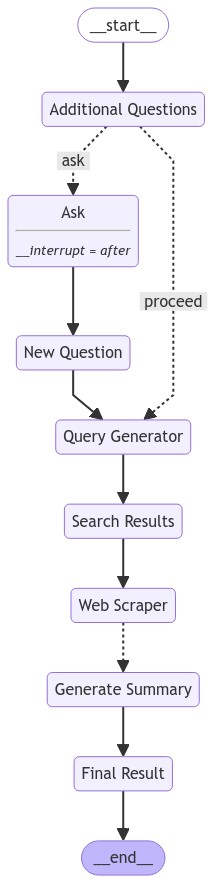

In [108]:
from IPython.display import Image, display

try:
    display(Image(perplexity_clone_graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [132]:
import random
import string

def generate_random_alphanumeric(length=4):
  characters = string.ascii_letters + string.digits
  result = ''.join(random.choice(characters) for i in range(length))
  return result

query_id = generate_random_alphanumeric()
print(query_id)

kAcw


In [133]:
config = {"configurable": {"thread_id": f'{query_id}'},"recursion_limit": 20}

In [134]:
from langchain_core.messages import BaseMessage, HumanMessage
inputs = {
    "messages": [HumanMessage(content="What is the score")],
}

In [135]:
outputs = perplexity_clone_graph.invoke(inputs, config)

<scratchpad>
1. Is the core question or request clearly stated?
   - The message "What is the score" is a clear request for information about a score.

2. Are all necessary details provided to understand the context?
   - The message does not specify which score is being referred to (e.g., a specific game, match, or event).

3. Would additional information significantly change or improve the response?
   - Yes, knowing the context (e.g., which game or event) would significantly improve the response, as it would allow for a precise and relevant answer.

4. Is the missing information essential or helpful?
   - The missing information is essential to provide an accurate and relevant response.

Given these points, additional input is necessary to understand which score the user is asking about.
</scratchpad>

<answer>
YES: Additional input is required.
Justification: The message does not specify which score is being referred to, and this information is essential to provide an accurate and 

In [136]:
from IPython.display import Markdown, display
display(Markdown(outputs['messages'][-1].content))

To provide you with the score, I need more context. Could you please specify:

1. What game or event are you referring to?
2. Who are the teams or players involved?
3. When did the game or event take place?

With this information, I can help you find the score you're looking for.

In [137]:
# First, lets get the current state
current_state = perplexity_clone_graph.get_state(config)
print(current_state)

StateSnapshot(values={'messages': [HumanMessage(content='What is the score'), AIMessage(content="To provide you with the score, I need more context. Could you please specify:\n\n1. What game or event are you referring to?\n2. Who are the teams or players involved?\n3. When did the game or event take place?\n\nWith this information, I can help you find the score you're looking for.", response_metadata={'token_usage': {'prompt_tokens': 19, 'total_tokens': 91, 'completion_tokens': 72}, 'model': 'mistral-large-latest', 'finish_reason': 'stop'}, id='run-5bfa5a8d-86ca-4786-adcf-8817909da9ca-0', usage_metadata={'input_tokens': 19, 'output_tokens': 72, 'total_tokens': 91})], 'next': '<scratchpad>\n1. Is the core question or request clearly stated?\n   - The message "What is the score" is a clear request for information about a score.\n\n2. Are all necessary details provided to understand the context?\n   - The message does not specify which score is being referred to (e.g., a specific game, ma

In [138]:
last_message = current_state.values["messages"][-1]
print(last_message.content)

To provide you with the score, I need more context. Could you please specify:

1. What game or event are you referring to?
2. Who are the teams or players involved?
3. When did the game or event take place?

With this information, I can help you find the score you're looking for.


In [139]:
input_message = [HumanMessage(content="I am referring to the recent cricket match between India and Sri Lanka")]

In [140]:
perplexity_clone_graph.update_state(
    # Which state to update
    config,
    # The updated values to provide. The messages in our `State` are "append-only", meaning this will be appended
    # to the existing state. We will review how to update existing messages in the next section!
    {"messages": input_message},
)

{'configurable': {'thread_id': 'kAcw',
  'checkpoint_ns': '',
  'checkpoint_id': '1ef5e259-f93b-686f-8003-13979dc8aca4'}}

In [141]:
outputs = perplexity_clone_graph.invoke(None, config)

Fetching pages: 100%|##########| 2/2 [00:00<00:00,  5.22it/s]


In [142]:
from IPython.display import Markdown, display
display(Markdown(outputs['messages'][-1].content))

Based on the provided context, there are two recent cricket matches between India and Sri Lanka mentioned. I'll provide information on both:

1. ICC Cricket World Cup 2023 match:
   - India: 357/8
   - Sri Lanka: 55 (19.4/50 ov, T:358)
   - Result: India won by 302 runs
   Source: [ESPNcricinfo](https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-sri-lanka-33rd-match-1384424/live-match-blog)

2. 1st T20I match on July 27, 2024:
   - India: 213/7
   - Sri Lanka: 170 (19.2/20 ov, T:214)
   - Result: India won by 43 runs
   Source: [ESPNcricinfo](https://www.espncricinfo.com/series/india-in-sri-lanka-2024-1442984/sri-lanka-vs-india-1st-t20i-1442987/match-report)

Both matches resulted in victories for India, with the World Cup match being a more significant win in terms of the run difference.